In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


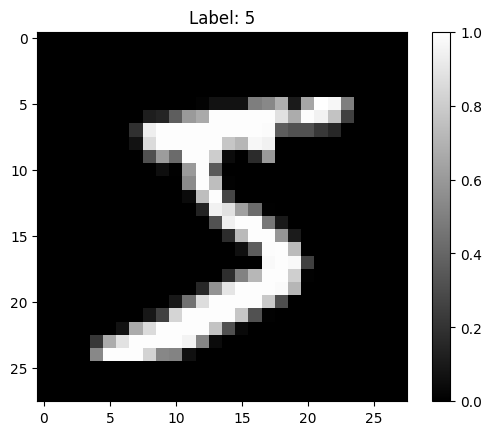

In [4]:
# Load the MNIST dataset (handwritten digits)
mnist = keras.datasets.mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()

In [6]:
from tensorflow.keras import layers

# Define the neural network with the updated best practice
model = keras.Sequential([
    layers.Input(shape=(28, 28)),  # Explicitly define the input shape here
    layers.Flatten(),             # Flatten the 28x28 images into a 1D array
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 classes
])


In [7]:
# Compile the model
model.compile(
    optimizer='adam',                # Optimizer to adjust weights
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']             # Track accuracy during training
)


In [8]:
# Train the model
history = model.fit(
    x_train, y_train,               # Training data (images and labels)
    epochs=5,                       # Number of passes through the dataset
    validation_data=(x_test, y_test) # Test data for validation
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8752 - loss: 0.4363 - val_accuracy: 0.9589 - val_loss: 0.1351
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9648 - loss: 0.1180 - val_accuracy: 0.9716 - val_loss: 0.0916
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0744 - val_accuracy: 0.9758 - val_loss: 0.0779
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0574 - val_accuracy: 0.9747 - val_loss: 0.0770
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9880 - loss: 0.0404 - val_accuracy: 0.9777 - val_loss: 0.0724


In [10]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9755 - loss: 0.0814
Test Accuracy: 97.77%
Test Loss: 0.0724


In [12]:
# Save the trained model in Keras format
model.save('mnist_digit_classifier.keras')
print("Model saved as 'mnist_digit_classifier.keras'")


Model saved as 'mnist_digit_classifier.keras'


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


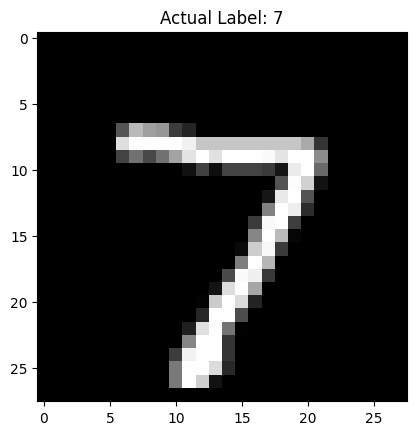

Predicted Label: 7


In [13]:
# Use the trained model to make a prediction
predictions = model.predict(x_test)

# Display the first test image
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Actual Label: {y_test[0]}")
plt.show()

# Predicted label for the first test image
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")


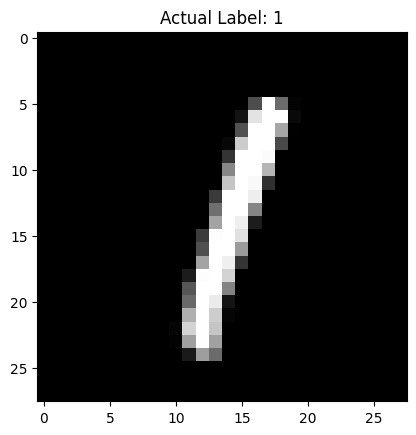

Predicted Label: 1


In [14]:
# Test on another image
index = 5  # Change this to try different images
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Actual Label: {y_test[index]}")
plt.show()

# Predicted label for the selected test image
predicted_label = np.argmax(predictions[index])
print(f"Predicted Label: {predicted_label}")


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test dataset
y_pred = np.argmax(predictions, axis=1)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 973    1    1    1    1    0    1    0    1    1]
 [   0 1130    1    1    0    0    2    0    1    0]
 [   5    4  999    2    4    1    2   10    5    0]
 [   1    0    1  989    1    2    0    5    4    7]
 [   1    0    2    0  964   